## MATH 210 Assignment 4 Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
%matplotlib inline

**Question 1**

(a) The second derivative of $f(x) = \ln(\ln x)$ is given by


\begin{align*}
f'(x) &= \frac{1}{x \ln x} \\
f''(x) &= -\frac{\ln x + 1}{(x \ln x)^2}
\end{align*}

(b) Consider the third derivative $f'''(x)$

\begin{align*}
f'''(x) &= -\frac{(x \ln x)^2(1/x) - 2(\ln x + 1)(x\ln x)(\ln x + 1)}{(x \ln x)^4} \\
&= \frac{2(\ln x + 1)^2 - \ln x}{(x \ln x)^3} \\
\end{align*}

Since $2(\ln x + 1)^2 > \ln x$ and $(x \ln x)^3 > 0$ for all $x \geq e$, the derivative of $f''(x)$ (namely $f'''(x)$) is positive for all $x \geq e$.

Therefore $f''(x)$ is increasing for $x \geq e$. Also, $f''(x) < 0$ for all $x \geq e$. Finally, since $f''(e) = -\frac{2}{e^2}$, we conclude that

$$
-\frac{2}{e^2} \leq f''(x) < 0 \ \ \text{for all} \ x \geq e
$$

Therefore $\displaystyle | f''(x)| \leq \frac{2}{e^2}$ for all $x \geq e$.

(c) The number of subintervals $N$ to use in the Trapezoid rule to guarantee the error is less than $\epsilon$ is determined by the error formula

\begin{align*}
\left| \, \int_a^b f(x) dx - T_N(f) \, \right| \leq \frac{(b-a)^3}{12N^2}M
\end{align*}

Therefore 

$$
\frac{(b-a)^3}{12N^2}M < \epsilon \ \ \ \Longrightarrow \ \ \ \sqrt{\frac{(b-a)^3}{12\epsilon}M} < N
$$

In [2]:
import numpy as np
import scipy.integrate as spi

def log_log(u,abs_tolerance=0.0001):
    '''Use the Trapezoid rule to approximate the integral of f(x)=ln(ln(x)) for x from e to u.
    
    Parameters
    ----------
    u : number, the upper limit of integration
    abs_tolerance : number, bound on the error of the approximation
    
    Returns
    -------
    Approximation of the integral of f(x)=ln(ln(x)) from e to u using sufficient subintervals N
    to guarantee the error is less than abs_tolerance.
    '''
    N = np.sqrt((u - np.e)**3*(2/np.e**2)/(12*abs_tolerance))
    N = int(np.ceil(N))
    x = np.linspace(np.e,u,N+1)
    y = np.log(np.log(x))
    I = spi.trapz(y,x)
    return I

**Question 2**

(a) The fourth derivative of $f(x)=e^{-x^2}$ is given by

\begin{align*}
f(x) &= e^{-x^2} \\
f'(x) &= -2x e^{-x^2} \\
f''(x) &= 2(2x^2 - 1) e^{-x^2} \\
f'''(x) &= 8x e^{-x^2} - 4x(2x^2 - 1)e^{-x^2} \\
&= 4(3x - 2x^3)e^{-x^2} \\
f''''(x) &= 4(3 - 6x^2)e^{-x^2} - 8x(3x - 2x^3)e^{-x^2} \\
&= 4(3 - 12x^2 + 4x^4) e^{-x^2}
\end{align*}

(b)

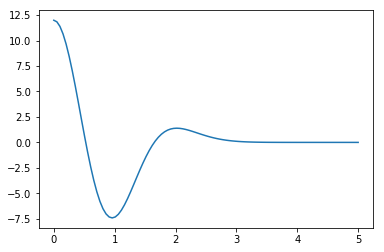

In [3]:
x = np.linspace(0,5,100)
y = 4*(3 - 12*x**2 + 4*x**4)*np.exp(-x**2)
plt.plot(x,y)
plt.show()

Since $\lim_{x \to \infty} f''''(x) = 0$ because of the term $e^{-x^2}$ and the plot shows the maximum value at $x=0$, we deduce that $|f''''(x)| < |f''''(0)| = 12$.

(c) The error formula in Simpson's rule is given by

$$
E_N^S(F) \leq \frac{(b-a)^5}{180N^4}M^4
$$

where $|f''''(x)| \leq M$. From (b), we choose $M=12$. Therefore


$$
\frac{(b-a)^5}{180N^4}M^4 < \epsilon \ \ \ \Longrightarrow \ \ \ \left( \frac{(b-a)^5}{180\epsilon}M^4 \right)^{1/4} < N
$$

In [4]:
def erf(u,abs_tolerance=0.0001):
    '''Use Simpson's rule to approximate the integral of f(x)=exp(-x^2) for x from 0 to u.
    
    Parameters
    ----------
    u : number, the upper limit of integration
    abs_tolerance : number, bound on the error of the approximation
    
    Returns
    -------
    Approximation of the integral of f(x)=exp(-x^2) from 0 to u using sufficient subintervals N
    to guarantee the error is less than abs_tolerance.
    '''
    N = (u**5*12**4/(180*abs_tolerance))**0.25
    N = int(np.ceil(N))
    x = np.linspace(0,u,N+1)
    y = np.exp(-x**2)
    I = spi.simps(y,x)
    return I

**Question 3**

In [5]:
from scipy.misc import comb, factorial

def derivatives(f,a,n,h=0.001):
    '''Compute the derivatives of f at x=a using the central difference formulas.
    
    Parameters
    ----------
    f : a function of a single variable
    a : number
    n : integer, compute derivatives up to order n
    h : number, step size used in the central difference formula
    
    Returns
    -------
    1D NumPy array of approximations of derivatives f'(a),f''(a),...,f^{(n)}(a)
    computed by the central difference formula:
    
    f^{(n)}(a) = (1/(2^n h^n)) \sum_{k=0}^n (−1)^k (n \choose k) f(a+(n−2k)h)
    '''
    derivatives = []
    for m in range(1,n+1):
        D = 1/(2**m * h**m) * np.sum([(-1)**k * comb(m,k) * f(a + (m - 2*k)*h) for k in range(0,m+1)])
        derivatives.append(D)
    return np.array(derivatives)

In [6]:
derivatives(lambda x: x**5,1,3)

array([  5.00001  ,  20.00004  ,  60.0000602])

**Question 4**

In [7]:
def taylor(f,a,n,L):
    '''Plot f(x) and its Taylor polynomial of degree n at x=a.
    
    Parameters
    ----------
    f : function of a single variable
    a : number
    n : integer, the degree of the Taylor polynomial
    L : number, plot the functions over the interval [a-L,a+L]
    
    Returns
    -------
    None
    '''
    Ds = derivatives(f,a,n)
    x = np.linspace(a-L,a+L,50*int(L))
    y = f(x)
    T = f(a) + sum([Ds[k-1]/factorial(k) * (x - a)**k for k in range(1,n+1)])
    plt.plot(x,y,x,T)
    plt.legend(['$y = f(x)$','Taylor polynomial'])
    plt.show()

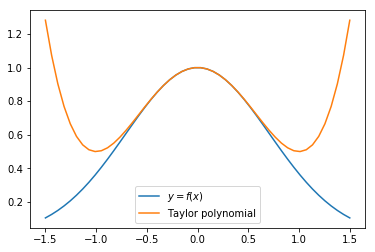

In [8]:
taylor(lambda x: np.exp(-x**2),0,4,1.5)

**Question 5**

In [9]:
def newton(f,x0,h=0.001,tolerance=0.001,max_iter=100):
    '''Implement Newton's method to approximate a solution of the equation f(x) = 0.
    
    Parameters
    ----------
    f : function of a single variable
    x0 : number, an initial guess for a solution of f(x) = 0
    h : number, step size used to approximate f'(x) in central difference method
    tolerance : number, algorithm terminates when |f(xn)| < tolerance
    max_iter : integer, algorithm terminates when the number of iterations of Newton's method exceeds max_iter
    
    Returns
    -------
    An approximation xn of a solution of f(x) = 0 such that |f(xn)| < tolerance. If Newton's method encounters
    a zero derivative, the function termiantes and returns None. If the number of iterations exceeds max_iter,
    the function returns None
    '''
    xn = x0
    for n in range(0,max_iter):
        # Return value if most recent approximation is within desired tolerance
        if abs(f(xn)) < tolerance:
            return xn
        # Approximate the derivative
        Df = (f(xn + h) - f(xn - h))/(2*h)
        if abs(Df) < 1e-14:
            print('Zero derivative. Algorithm stopped.')
            return None
        # Compute next iteration of Newton's method
        xn = xn - f(xn)/Df
    print("Exceeded maximum iterations. No root found.")
    return None

In [10]:
v = newton(lambda x: np.cos(x) - x,1,tolerance=0.0000001)

In [11]:
v

0.73908513338341153

In [12]:
abs(np.cos(v) - v) < 0.0000001

True